# Description


1. Title: Bank Marketing

2. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client    was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   The classification goal is to predict if the client will subscribe a term deposit (variable y).


In [1]:
# import the necessary Labr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
data = pd.read_csv('bank-full.csv')

In [3]:
pd.options.display.max_columns = None

# Display Top 5 Rows of The Dataset

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Check Last 5 Rows of the Dataset

In [5]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Find Shape of our Data (How Many Number Of Rows And Columns)

In [6]:
data.shape

(45211, 17)

In [7]:
print("Number of Rows :-",data.shape[0]),
print("Number of Columns :-",data.shape[1])

Number of Rows :- 45211
Number of Columns :- 17


In [8]:
data.value_counts('y')

y  
no     39922
yes     5289
dtype: int64

# Calculating Summary Statistics

In [9]:
summary_statistic = data.describe()
summary_statistic

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Checking Duplicate values

In [11]:
data.duplicated().any()

False

# Checking Null Values in Dataset

In [12]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<Axes: xlabel='previous', ylabel='Count'>

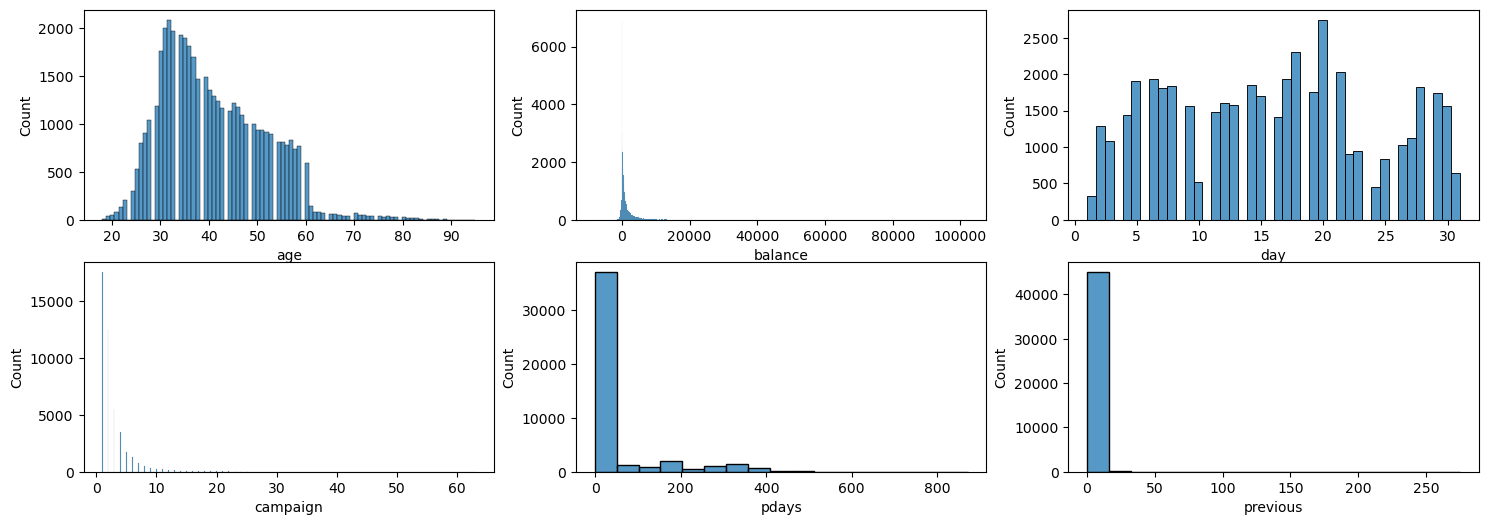

In [14]:
#Histogram Plot
fig, axes=plt.subplots(2,3 , figsize=(18,6))
sns.histplot(data, x='age', ax=axes[0,0])
sns.histplot(data, x='balance', ax=axes[0,1])
sns.histplot(data, x='day', ax=axes[0,2])
sns.histplot(data, x='campaign', ax=axes[1,0])
sns.histplot(data, x='pdays', ax=axes[1,1])
sns.histplot(data, x='previous', ax=axes[1,2])

# Box Plot

<Axes: xlabel='previous'>

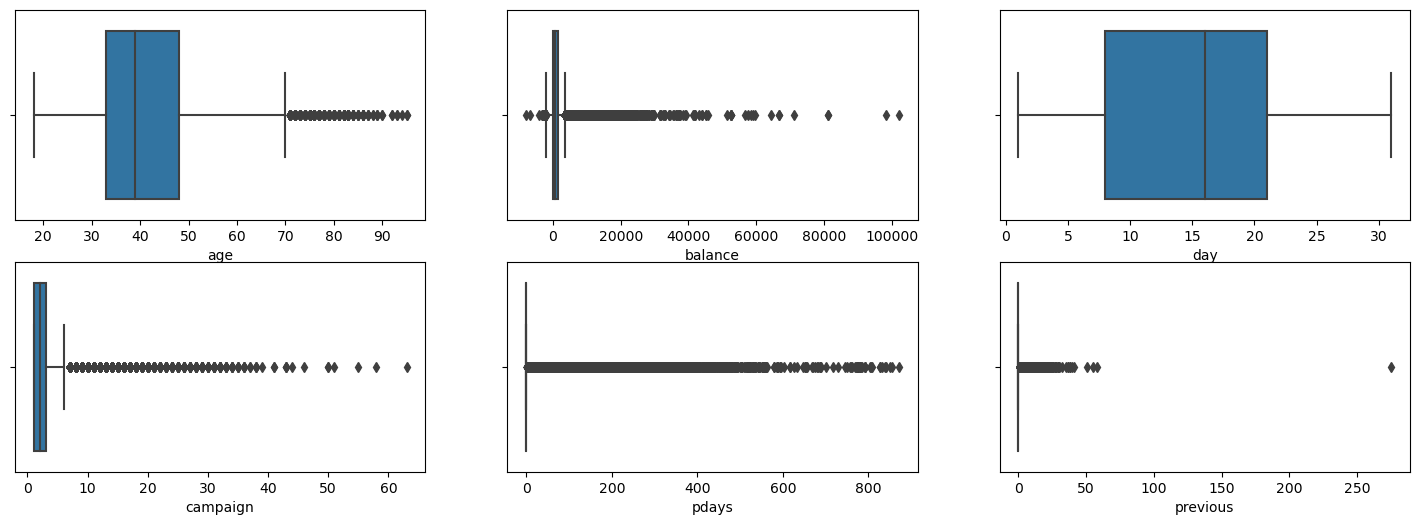

In [15]:
fig, axes= plt.subplots(2,3, figsize=(18,6))

sns.boxplot(data, x='age', ax=axes[0,0])
sns.boxplot(data, x='balance', ax=axes[0,1])
sns.boxplot(data, x='day', ax=axes[0,2])
sns.boxplot(data, x='campaign', ax=axes[1,0])
sns.boxplot(data, x='pdays', ax=axes[1,1])
sns.boxplot(data, x='previous', ax=axes[1,2])

# Class Distribution

no     39922
yes     5289
Name: y, dtype: int64


Text(0.5, 1.0, 'Bank Deposite')

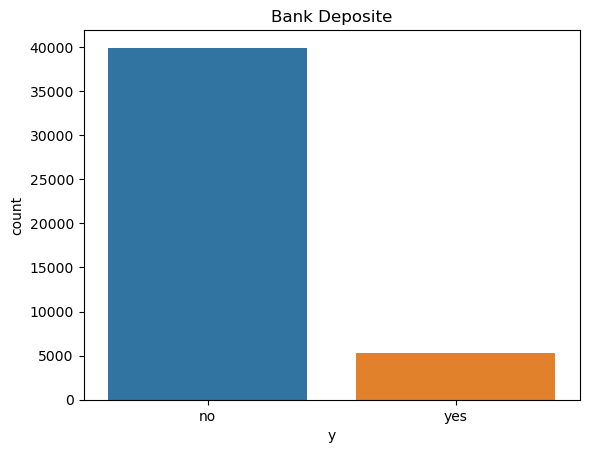

In [16]:
print(data.y.value_counts())
axes=sns.countplot(x='y', data=data)
plt.title("Bank Deposite")

Observation
1. Bank Deposite Product subscribed by 5289 peoples out of 45211
2. Bank Deposite Product not subscribed by 39922 peoples out of 45211
3. The Data Set is imbalanced data because the Not Subscribed Count is Greater then subscribed 

# Heatmap

<Axes: >

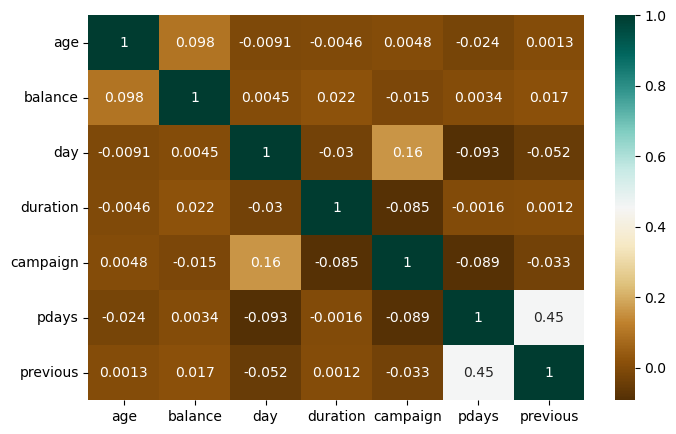

In [17]:
plt.figure(figsize=(8,5))
ploting = data.corr(numeric_only=True)
sns.heatmap(ploting, cmap='BrBG', annot=True)


In [18]:
data.shape

(45211, 17)

In [19]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data preprocessing using StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [21]:
data_num = data.copy()

In [22]:
sc = StandardScaler()
num_cols = ['age', 'balance', 'day', 'pdays', 'campaign','previous']
data_num[num_cols] = sc.fit_transform(data_num[num_cols])
data_num = data_num.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'], axis=1)
data_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.25194


# Encode Categorical Features

In [23]:
encoder = OneHotEncoder(sparse=False)

In [24]:
#Copy original dataframe to df_target
df_target = data.copy()
df_target.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
df_target = df_target.drop(columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'])

In [26]:
#Encode target values yes to 1 and no to 0 
df_target['y'] = df_target['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [27]:
df_target.head()

,y
0,0
1,0
2,0
3,0
4,0


In [28]:
#Encode Categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
catg_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

df_categ = data.copy()
df_categ.head()

# Encoding Categorical data to numeric data
df_encoded = pd.DataFrame(encoder.fit_transform(df_categ[catg_cols]))

# Getting feature names from encoder.get_feature_names_out
encoded_feature_names = encoder.get_feature_names_out(input_features=catg_cols)

# Assigning the feature names to the encoded DataFrame columns
df_encoded.columns = encoded_feature_names

In [29]:
#Replace Categorial with Encoding data
df_categ = df_categ.drop(catg_cols, axis=1)
df_categ = pd.concat([data_num, df_encoded, df_target], axis=1)

print('Shape of DataFrame : ', df_categ.shape)
df_categ.head()

Shape of DataFrame :  (45211, 52)


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.25194,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.25194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


# Split Dataset for Training and Testing

#Split Data into 2 dataset, Training and Testing, In this We split data into training and testing group with the ratio of 80:20.

In [30]:
# Selecting Features
feature = df_categ.drop('y', axis=1)

#Selecting Target
target = df_categ['y']

# Training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target,
                                                   shuffle = True,
                                                   test_size=0.2,
                                                   random_state=1)

#Showing Training and Testing Data Results

print('Shape of training feature : ', X_train.shape )
print('Shape of testing feature : ', X_test.shape )
print('Shape of training label : ', y_train.shape )
print('Shape of testing label : ', y_test.shape )

Shape of training feature :  (36168, 51)
Shape of testing feature :  (9043, 51)
Shape of training label :  (36168,)
Shape of testing label :  (9043,)


# Logistic Regression 

In [31]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

C:\Users\Gaurav\anaconda3\BIA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred1 = log.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
training_data_test = log.predict(X_train)
accuracy_score(y_train,training_data_test)

0.9009621765096217

In [34]:
accuracy_score(y_test,y_pred1)

0.9001437576025655

In [35]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,y_pred1)


0.6490872210953347

In [36]:
recall_score(y_test,y_pred1) # this is the better option

0.3047619047619048

In [37]:
f1_score(y_test,y_pred1) # this one too

0.4147764095917045

# Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
# Initialize the DecisionTreeClassifier with max_depth
dt_pruned = DecisionTreeClassifier(max_depth=5)  # You can adjust the max_depth value
# Fit the model
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [40]:
y_pred_pruned = dt_pruned.predict(X_test)

In [41]:
training_data_test1 = log.predict(X_train)

In [42]:
accuracy_score(y_train,training_data_test1)

0.9009621765096217

In [43]:
accuracy_score(y_test,y_pred_pruned)

0.9030189096538759

In [44]:
precision_score(y_test,y_pred_pruned)

0.6504347826086957

In [45]:
recall_score(y_test,y_pred_pruned)

0.35619047619047617

In [46]:
f1_score(y_test,y_pred_pruned)

0.46030769230769225

# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier()

In [49]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
y_pred3 = rf.predict(X_test)

In [51]:
training_data_test2 = log.predict(X_train)

In [52]:
accuracy_score(y_train,training_data_test2)

0.9009621765096217

In [53]:
xaccuracy_score(y_test,y_pred3)

0.9060046444763906

In [54]:
precision_score(y_test,y_pred3)

0.6515151515151515

In [55]:
recall_score(y_test,y_pred3)

0.4095238095238095

In [56]:
f1_score(y_test,y_pred3)

0.5029239766081871

In [57]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],'ACC':[accuracy_score(y_test,y_pred1)*100,accuracy_score(y_test,y_pred_pruned)*100,accuracy_score(y_test,y_pred3)*100]})

In [58]:
final_data

,Models,ACC
0,LR,90.014376
1,DT,90.301891
2,RF,90.600464


<Axes: xlabel='Models', ylabel='ACC'>

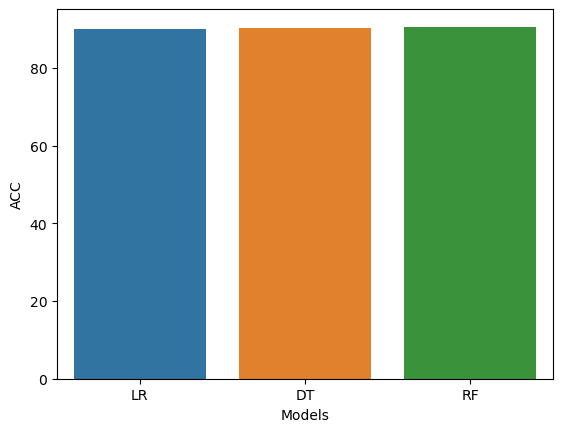

In [59]:
sns.barplot(x='Models', y='ACC', data=final_data)

In [60]:
#In the Model RF is Giving Best Accuracy
#There is minor difference between the 3 models